In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

import sys
sys.path.append('../scripts')
from utils import config

In [2]:
housing = pd.read_csv('../data/raw/NY-House-Dataset.csv')

display(housing.head())

print(f'\n----\nShape: {housing.shape}')

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856



----
Shape: (4801, 17)


In [3]:
print('Count of Unique Values in each Column:')

for col in housing.columns:
    print(f'{col} - {housing[col].dtype} - {len(housing[col].unique())}')

Count of Unique Values in each Column:
BROKERTITLE - object - 1036
TYPE - object - 13
PRICE - int64 - 1274
BEDS - int64 - 27
BATH - float64 - 22
PROPERTYSQFT - float64 - 1445
ADDRESS - object - 4582
STATE - object - 308
MAIN_ADDRESS - object - 4583
ADMINISTRATIVE_AREA_LEVEL_2 - object - 29
LOCALITY - object - 11
SUBLOCALITY - object - 21
STREET_NAME - object - 174
LONG_NAME - object - 2731
FORMATTED_ADDRESS - object - 4550
LATITUDE - float64 - 4196
LONGITUDE - float64 - 4118


In [11]:
housing.STATE.value_counts()

STATE
Brooklyn, NY 11235            102
Brooklyn, NY 11209             94
Forest Hills, NY 11375         91
Brooklyn, NY 11234             90
Staten Island, NY 10314        86
                             ... 
Queens, NY 11427                1
Queens, NY 11429                1
Long Island City, NY 11109      1
Brooklyn, NY 11694              1
Ozone Park, NY 11416            1
Name: count, Length: 308, dtype: int64

In [30]:
housing['ZIPCODE'] = housing.STATE.apply(lambda x: x[-5:])
zip_counts = housing.ZIPCODE.value_counts()
housing.ZIPCODE.apply(lambda x: x if x in zip_counts[zip_counts > 30].index else 'Other').value_counts()

ZIPCODE
Other    1650
11375     105
11235     103
11209      94
11234      93
10314      87
10463      82
10024      77
10022      76
11372      74
10312      73
10023      73
10021      71
10306      69
10065      66
10019      65
11374      64
10128      63
10025      62
11201      61
10011      60
10301      58
10471      57
10028      57
10304      56
11215      53
11360      53
10016      52
11229      52
10014      51
10003      50
10465      46
11208      45
11357      45
10305      45
11221      44
10075      41
11432      41
11373      41
11204      41
11367      39
10309      39
10013      39
11355      39
10462      38
11414      38
11377      37
11214      36
11207      36
11368      35
11354      35
11230      35
11223      34
11203      34
10308      34
11224      33
10012      31
11236      31
10469      31
10466      31
Name: count, dtype: int64

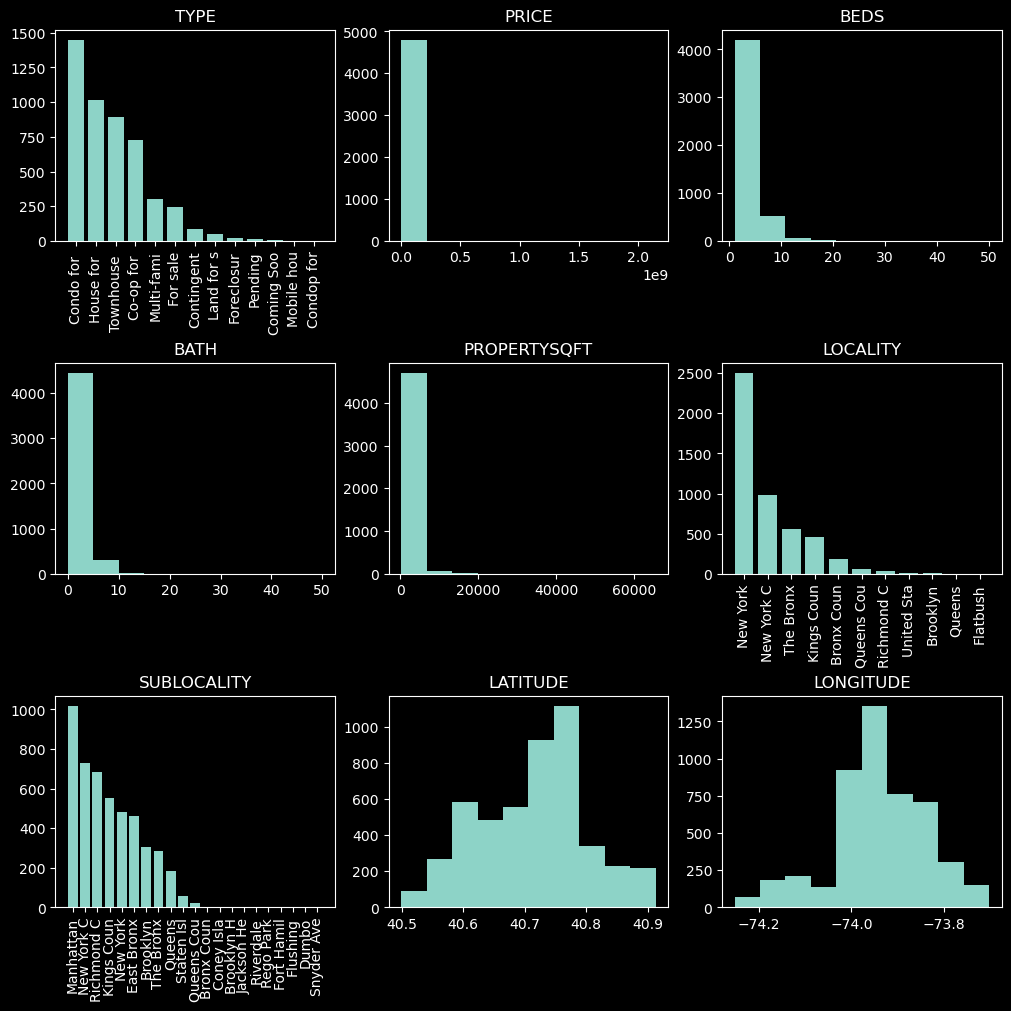

In [4]:
cols_for_hist = ['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LOCALITY', 'SUBLOCALITY', 'LATITUDE', 'LONGITUDE']

fig, axes = plt.subplots(3, 3, figsize=(10, 10), layout='constrained')

for col, ax in zip(cols_for_hist, axes.ravel()):
    if housing[col].dtype == 'object':
        ax.bar(housing[col].unique(), housing[col].value_counts())
        ax.set_xticks(range(len(housing[col].unique())))
        ax.set_xticklabels([s[:10] for s in housing[col].unique()], rotation=90)
    else:
        ax.hist(housing[col])
    ax.set_title(col)

In [5]:
print('Count of NAs in each Column:')

for col in housing.columns:
    print(f'{col} - {housing[col].dtype} - {len(housing.loc[housing[col].isna()])}')

Count of NAs in each Column:
BROKERTITLE - object - 0
TYPE - object - 0
PRICE - int64 - 0
BEDS - int64 - 0
BATH - float64 - 0
PROPERTYSQFT - float64 - 0
ADDRESS - object - 0
STATE - object - 0
MAIN_ADDRESS - object - 0
ADMINISTRATIVE_AREA_LEVEL_2 - object - 0
LOCALITY - object - 0
SUBLOCALITY - object - 0
STREET_NAME - object - 0
LONG_NAME - object - 0
FORMATTED_ADDRESS - object - 0
LATITUDE - float64 - 0
LONGITUDE - float64 - 0


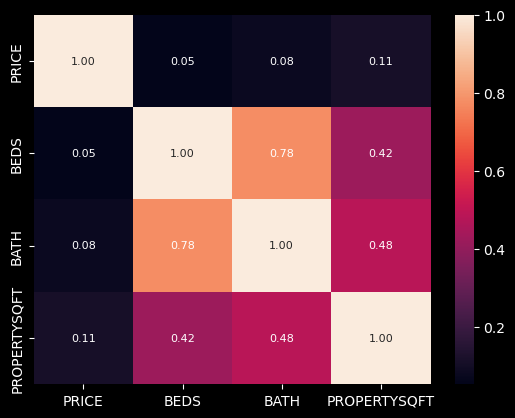

In [6]:
correlation_matrix = housing.drop(config['FEATURES_TO_DROP'] + config['FEATURES_TO_ONEHOT'], axis=1).corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 8})
plt.show()

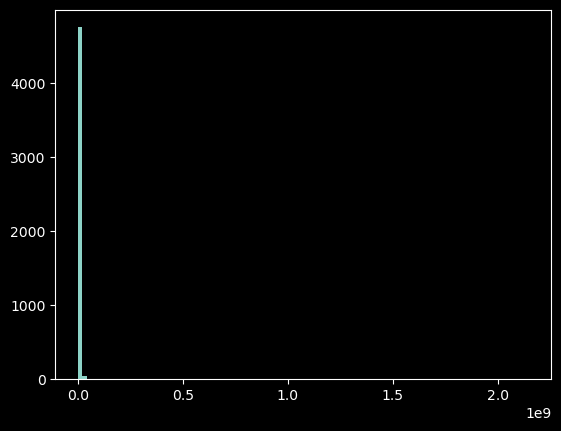

In [74]:
plt.figure()
plt.hist(housing.PRICE, bins=100)
plt.show()

In [84]:
print(
    f'Percentage of houses with price < 1mm: {len(housing[housing.PRICE < 10**6]) / len(housing):.2f}'
)

Percentage of houses with price < 1mm: 0.62
